<a href="https://colab.research.google.com/github/mariel0503/aprendizaje-automatico-252601/blob/main/PAE3_Medidas_de_Similitud_Milan_Mariel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 **Taller 4.1: Taller de Medidas de Similitud y Disimilitud**


## OBJETIVOS DEL TALLER:
Comprender y aplicar diferentes medidas de similitud y disimilitud en conjuntos de datos, analizando su comportamiento en distintos contextos de distribución de datos. Implementar y calcular al menos 6 medidas de distancia diferentes:

* ✅Distancia Euclidiana (L2)
* ✅Distancia Manhattan (L1)
* ✅Distancia Chebyshev (L∞)
* ✅Similitud de Coseno
* ✅Distancia de Mahalanobis
* ✅Distancia de Jaccard

Representar gráficamente datasets en espacios bidimensionales

* ✅Visualizar centros y puntos de referencia en gráficos de dispersión
* ✅Interpretar relaciones espaciales a partir de representaciones visuales

# 🔧 **CONFIGURACIÓN INICIAL**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

In [ ]:
import scipy.stats as st

def visualize_dataset(x, y, ds_center, c1, c2):
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ds_center_r = [np.mean(x), np.mean(y)]
  print(f'Centro real del cluster: x={ds_center_r[0]:.2f}, y={ds_center_r[1]:.2f}')
  print(f'Centro del cluster utilizado para el ejemplo: x={ds_center[0]:.2f}, y={ds_center[1]:.2f}')
  ax.scatter(ds_center[0], ds_center[1], s=200, c='b')
  # plot candidates
  ax.scatter(c1[0], c1[1], s=200, c='r')
  ax.scatter(c2[0], c2[1], s=200, c='g', marker='v')
  deltaX = (max(x) - min(x))/10
  deltaY = (max(y) - min(y))/10
  xmin = min(x) - deltaX
  xmax = max(x) + deltaX
  ymin = min(y) - deltaY
  ymax = max(y) + deltaY
  # Create meshgrid
  xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
  positions = np.vstack([xx.ravel(), yy.ravel()])
  values = np.vstack([x, y])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx.shape)
  # create gaussian contour lines
  cfset = ax.contourf(xx, yy, f, cmap='coolwarm', alpha=0.2)
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax], alpha=0.2)
  # write labels
  cset = ax.contour(xx, yy, f, colors='k', linestyles='dotted')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  plt.title('Kernel Gaussiano 2D')

In [ ]:
def visualize_scatter(x, y, ds_center, c1, c2):
  ds_center_real= [np.mean(x), np.mean(y)]
  plt.figure(figsize=(8, 6))  # Tamaño del gráfico
  plt.scatter(x, y, color='blue', alpha=0.6, label='Puntos de datos')
  plt.scatter(ds_center[0], ds_center[1], color='red', marker='X', s=100, label='Centro [2, 2]')
  plt.scatter(ds_center_real[0], ds_center_real[1], color='y', marker='X', s=100, label='Centro Real')
  plt.scatter(c1[0], c1[1], s=200, c='red', label='Candidato 1 (rojo)')
  plt.scatter(c2[0], c2[1], s=200, c='green', marker='v', label='Candidato 2 (verde)')
  plt.xlabel('Variable 1 (data_var_1)')
  plt.ylabel('Variable 2 (data_var_2)')
  plt.title('Dataset 2D con Distribución Normal alrededor de [2, 2]')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.legend()
  plt.show()

# 📁 **CREAR LOS DATASETS Y GRAFIQUE SUS DISTRIBUCIONES**

In [ ]:
# Crear un dataset artificial alrededor de un punto
def cargar_datasetDistNormal(n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generamos los puntox en 2D con funcion normal, al rededor del centro
    data_var_1 = np.random.randn(n_data_points) + ds_center[0]
    data_var_2 = np.random.randn(n_data_points) + ds_center[1]
    return data_var_1, data_var_2

In [ ]:
# Crear un dataset artificial alrededor de un punto con una relacion lineal de dependencia entre las variables
def cargar_datasetRelacionLineal(factor=np.array([1, 1]), n_data_points = 50, ds_center = np.array([2, 2])):
    # para hacer los experimentos reproducibles
    np.random.seed(42)
    # generar los datos con una relacion lineal
    data_var_1b = factor[0] * np.random.randn(n_data_points) + ds_center[0]
    data_var_2b = data_var_1b + factor[1] * np.random.randn(n_data_points)
    return data_var_1b, data_var_2b

In [ ]:
# Crear un dataset artificial alrededor de un punto con una relacion cuadratica de dependencia entre las variables
def cargar_datasetRelacionCuadratica(coeficientes=np.array([1, 0, 0]),
                                     n_data_points=50,
                                     rango_x=(-5, 5)):
    #coeficientes : array de 3 elementos [a, b, c]
    #    Coeficientes de la ecuación cuadrática: y = a*x² + b*x + c
    # Para hacer los experimentos reproducibles
    np.random.seed(42)
    # Extraer coeficientes
    a, b, c = coeficientes
    # Generar valores x uniformemente distribuidos
    x = np.random.uniform(rango_x[0], rango_x[1], n_data_points)
    # Aplicar la transformación cuadrática
    y_ideal = a * x**2 + b * x + c
    # Añadir ruido aleatorio (proporcional al rango de y)
    rango_y = np.max(y_ideal) - np.min(y_ideal)
    ruido = 0.1 * rango_y * np.random.randn(n_data_points)
    y = y_ideal + ruido
    return x, y

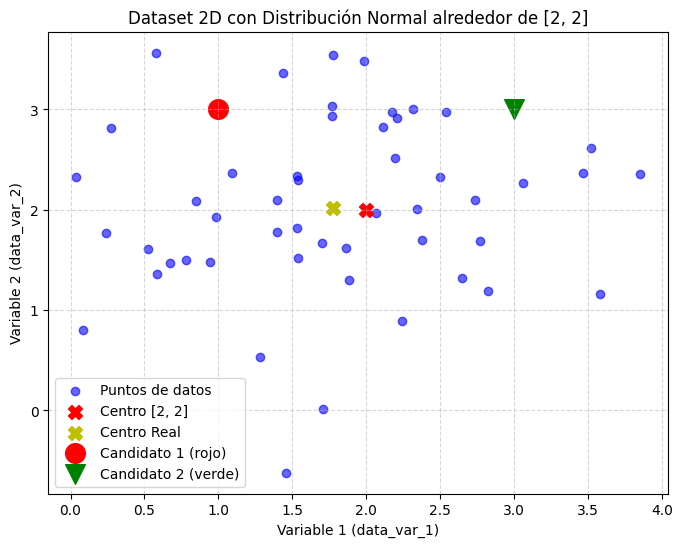

Centro real del cluster: x=1.77, y=2.02
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00


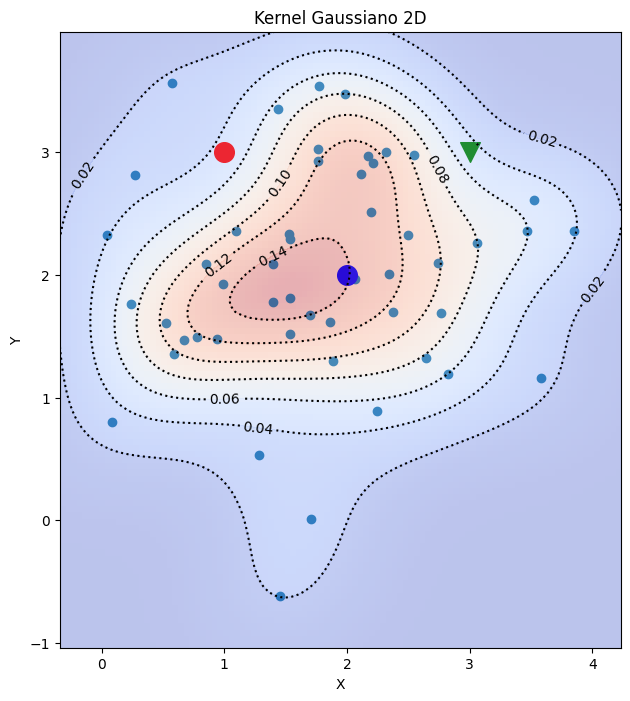

In [ ]:
# Cargar dataset
ds_center = np.array([2, 2])
dx, dy =cargar_datasetDistNormal(50, ds_center)
# establecemos nuestros dos puntos candidatos de prueba
c1 = np.array([ds_center[0] - 1, 3])
c2 = np.array([ds_center[1] + 1, 3])
visualize_scatter(dx, dy, ds_center, c1, c2)
visualize_dataset(dx, dy, ds_center, c1, c2)

# 🎯 **EJ 1:GRAFIQUE LAS DISTRIBUCIONES DE LOS DATASETS**

Centro real del cluster: x=1.77, y=1.78
Centro del cluster utilizado para el ejemplo: x=2.00, y=2.00
Centro real del cluster: x=-0.54, y=6.23
Centro del cluster utilizado para el ejemplo: x=0.00, y=0.00


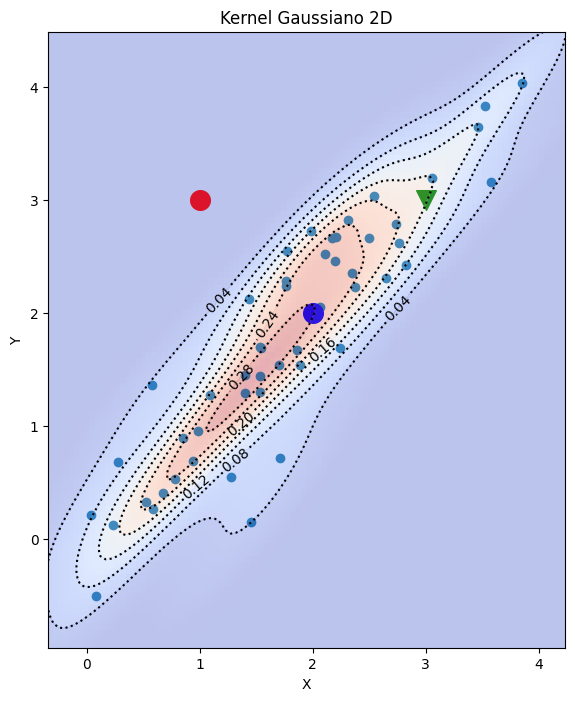

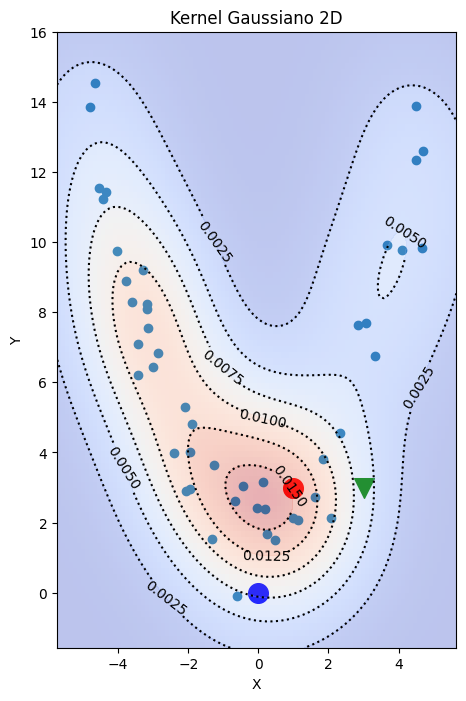

In [ ]:
# TODO 1.1 crear y vizualizar el dataset con relacion lineal y con relacion cuadratica
dxr, dyr = cargar_datasetRelacionLineal(
    factor=np.array([1, 0.5]),
    n_data_points=50,
    ds_center=np.array([2, 2])
)

dx2, dy2 = cargar_datasetRelacionCuadratica(
    coeficientes=np.array([0.5, 0, 2]),
    n_data_points=50,
    rango_x=(-5, 5)
)

visualize_dataset(dxr, dyr, np.array([2,2]), c1, c2)
visualize_dataset(dx2, dy2, np.array([0,0]), c1, c2)


In [ ]:
# Dataset grande
dxGrande, dyGrande =cargar_datasetRelacionLineal([20,10], 1000, [50,100])

# 🎯 **EJ 2: IDENTIFIQUE QUE TAN DEPENDIENTES SON LOS DATASETS**




In [ ]:
# TODO 2.1 : Use la covarianza para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr}, {dx2, dy2} y {dxGrande, dyGrande}
# su codigo aqui np.cov

cov_normal = np.cov(dx, dy)
print(f'Covarianza dataset con distribución normal:\n{cov_normal}\n')

cov_lineal = np.cov(dxr, dyr)
print(f'Covarianza dataset con relación lineal:\n{cov_lineal}\n')

cov_lineal_grande = np.cov(dxGrande, dyGrande)
print(f'Covarianza dataset con relación lineal Grande:\n{cov_lineal_grande}\n')

cov_cuadratica = np.cov(dx2, dy2)
print(f'Covarianza dataset con relación cuadratica:\n{cov_cuadratica}\n')



Covarianza dataset con distribución normal:
[[0.87173739 0.08985489]
 [0.08985489 0.76444418]]

Covarianza dataset con relación lineal:
[[0.87173739 0.91666484]
 [0.91666484 1.15270333]]

Covarianza dataset con relación lineal Grande:
[[383.54554143 375.65364293]
 [375.65364293 467.25326789]]

Covarianza dataset con relación cuadratica:
[[ 8.34535038 -1.24204787]
 [-1.24204787 15.18168342]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

Podemos visualizar que el dataset con relación lineal grande presenta la mayor dependencia lineal entre sus dos variables. Esto se evidencia en el valor de la covarianza entre las variables, que es significativamente mayor que en los demás datasets. Dicho valor indica que existe una relación lineal fuerte y directa, donde el aumento de una variable está acompañado por el aumento de la otra. Aunque el dataset con relación lineal normal también muestra una dependencia importante, su magnitud es menor en comparación con el dataset grande.


¿Cual es el problema que tiene la covarianza?

Podemos identificar que el principal problema de la covarianza es que depende de la escala y de las unidades de los datos, lo que dificulta la comparación entre distintos datasets. Un cambio en la magnitud de los valores puede producir una covarianza más alta sin que la relación entre las variables sea necesariamente más fuerte. Además, la covarianza solo mide relaciones lineales, por lo que no es adecuada para detectar dependencias no lineales, como las relaciones cuadráticas. Por esta razón, suele complementarse o reemplazarse por medidas normalizadas como el coeficiente de correlación.

In [ ]:
# TODO 2.2: Use el coeficiente de correlación de Pearson para identificar que tan dependiente es la relacion que existe entre los registros de los datasets {dx,dy}, {dxr, dyr} y {dxGrande, dyGrande}
# su codigo aqui np.corrcoef

# Correlación de Pearson dataset con distribución normal
corr_normal = np.corrcoef(dx, dy)
print(f'Correlación de Pearson dataset con distribución normal:\n{corr_normal}\n')

# Correlación de Pearson dataset con relación lineal
corr_lineal = np.corrcoef(dxr, dyr)
print(f'Correlación de Pearson dataset con relación lineal:\n{corr_lineal}\n')

# Correlación de Pearson dataset con relación lineal grande
corr_lineal_grande = np.corrcoef(dxGrande, dyGrande)
print(f'Correlación de Pearson dataset con relación lineal Grande:\n{corr_lineal_grande}\n')


Correlación de Pearson dataset con distribución normal:
[[1.         0.11007179]
 [0.11007179 1.        ]]

Correlación de Pearson dataset con relación lineal:
[[1.         0.91444789]
 [0.91444789 1.        ]]

Correlación de Pearson dataset con relación lineal Grande:
[[1.         0.88736636]
 [0.88736636 1.        ]]



### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué dataset tiene una mayor dependencia lineal entre sus dos variables?

Se observa que el dataset con relación lineal presenta la mayor dependencia lineal entre sus dos variables. Esto se observa en su coeficiente de correlación de Pearson, cuyo valor es aproximadamente 0.91, el más alto entre los datasets analizados. Este valor indica una relación lineal positiva fuerte, donde el incremento de una variable está estrechamente asociado con el incremento de la otra. Aunque el dataset con relación lineal grande también muestra una alta dependencia lineal, su correlación es ligeramente menor (0.89), lo que confirma que la relación del dataset lineal es más fuerte.

¿Que medida es mas facil de interpretar para identificar la dependencia entre dos variables de un dataset?

El coeficiente de correlación de Pearson es la medida más fácil de interpretar para identificar la dependencia entre dos variables. Esto se debe a que está normalizado y toma valores entre -1 y 1, lo que permite identificar de manera clara la dirección y la intensidad de la relación lineal. A diferencia de la covarianza, la correlación no depende de la escala de los datos, lo que facilita la comparación entre distintos datasets y evita interpretaciones erróneas causadas por diferencias en magnitud o unidades.

# 🎯 **EJ 3: CREE LAS FUNCIONES DE LAS MEDIDAS DE DISIMILITUD**

In [ ]:
#  TODO 3.1 completar el codigo de las funciones de las siguientes medidas de disimilitud:
#  Distancia Euclidiana, Distancia Manhattan, Distancia Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard
#  En scipy.spatial.distance tenemos disponibles las distancias minkowski, mahalanobis, jaccard, hamming, euclidean, cosine, entre otras.
#  En numpy tenemos la norma p =  np.linalg.norm

In [ ]:
from scipy.spatial.distance import mahalanobis, cosine, chebyshev, jaccard
import numpy as np

In [ ]:
def distancia_euclidiana(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord= 1)
   print(f'Distancia euclidiana del punto {p1} al punto {p2} = {dist}')
   return dist

In [ ]:
def distancia_manhattan(p1, p2):
   dist = np.linalg.norm(p2 - p1, ord=1) # ← COMPLETAR
   print(f'Distancia manhattan del punto {p1} al punto {p2} = {dist}')
   return dist

In [ ]:
# ← COMPLETAR Chebyshev, Similitud de Coseno, Mahalanobis y Jaccard

In [ ]:
def distancia_chebyshev(p1, p2):
    dist = chebyshev(p1, p2)
    print(f'Distancia Chebyshev del punto {p1} al punto {p2} = {dist}')
    return dist

In [ ]:
def similitud_coseno(p1, p2):
    sim = 1 - cosine(p1, p2)
    print(f'Similitud de Coseno entre {p1} y {p2} = {sim}')
    return sim

In [ ]:
def distancia_mahalanobis(p1, p2, mC):
    cov_inv = np.linalg.inv(mC)
    dist = mahalanobis(p1, p2, cov_inv)
    print(f'Distancia Mahalanobis del punto {p1} al punto {p2} = {dist}')
    return dist

In [ ]:
def distancia_jaccard(p1, p2):
    p1_bin = p1 > 0
    p2_bin = p2 > 0
    dist = jaccard(p1_bin, p2_bin)
    print(f'Distancia Jaccard entre {p1} y {p2} = {dist}')
    return dist

In [ ]:
# Ejecutar funciones
print("🔍 calculando las distancias de los puntos candidatos al centro")
print('Distancias primer dataset:\n')
ds_center =  np.array([np.mean(dx), np.mean(dy)])# ← COMPLETAR, calcule el centro del primer dataset
dist_euc1 = distancia_euclidiana(c1, ds_center)
dist_euc2 = distancia_euclidiana(c2, ds_center)
 # ← COMPLETAR, el resto de distancias
dist_man1 = distancia_manhattan(c1, ds_center)
dist_man2 = distancia_manhattan(c2, ds_center)

distancia_cheb1= distancia_chebyshev(c1, ds_center)
distancia_cheb2= distancia_chebyshev(c2, ds_center)

similitud_cos1 = similitud_coseno(c1, ds_center)
similitud_cos2 = similitud_coseno(c2, ds_center)

X1=np.column_stack((dx, dy))
mC1=np.cov(X1, rowvar=False)
distancia_mahalanobis1= distancia_mahalanobis(c1, ds_center, mC1)
distancia_mahalanobis2= distancia_mahalanobis(c2, ds_center, mC1)

distancia_jaccard1= distancia_jaccard(c1, ds_center)
distancia_jaccard2= distancia_jaccard(c2, ds_center)

print('Distancias segundo dataset:\n')
# ← COMPLETAR, calcule el centro del segundo dataset
ds_center_2 = np.array([np.mean(dxr), np.mean(dyr)])

# ← COMPLETAR para el resto de datasets

X2=np.column_stack((dxr, dyr))
mC2=np.cov(X2, rowvar=False)

distancia_euclidiana(c1, ds_center_2)
distancia_manhattan(c1, ds_center_2)
distancia_chebyshev(c1, ds_center_2)
similitud_coseno(c1, ds_center_2)
distancia_mahalanobis(c1, ds_center_2, mC2)
distancia_jaccard(c1, ds_center_2)

🔍 calculando las distancias de los puntos candidatos al centro
Distancias primer dataset:

Distancia euclidiana del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
Distancia euclidiana del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
Distancia manhattan del punto [1 3] al punto [1.77452609 2.01778087] = 1.7567452242759072
Distancia manhattan del punto [3 3] al punto [1.77452609 2.01778087] = 2.207693034788188
Distancia Chebyshev del punto [1 3] al punto [1.77452609 2.01778087] = 0.9822191295320475
Distancia Chebyshev del punto [3 3] al punto [1.77452609 2.01778087] = 1.2254739052561403
Similitud de Coseno entre [1 3] y [1.77452609 2.01778087] = 0.9212201531060056
Similitud de Coseno entre [3 3] y [1.77452609 2.01778087] = 0.9979490827692092
Distancia Mahalanobis del punto [1 3] al punto [1.77452609 2.01778087] = 1.4770847358703076
Distancia Mahalanobis del punto [3 3] al punto [1.77452609 2.01778087] = 1.6409774458129731
Distancia Jaccard entre [1 

np.float64(0.0)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué medidas de disimilitud son de un punto a otro punto?

Las medidas de disimilitud que comparan directamente un punto con otro punto son la distancia Euclidiana, la distancia Manhattan, la distancia Chebyshev, la similitud de Coseno y la distancia de Jaccard. Estas métricas se calculan únicamente a partir de las coordenadas de los dos puntos, sin considerar cómo están distribuidos el resto de los datos. Por esta razón, miden únicamente cercanía geométrica u orientación entre puntos individuales.


¿Qué medidas de disimilitud son de un punto a una distribución?

La distancia de Mahalanobis es una medida de disimilitud de un punto respecto a una distribución de datos. A diferencia de las otras distancias, esta métrica utiliza la matriz de covarianza del dataset, lo que le permite evaluar qué tan lejos se encuentra un punto considerando la forma, escala y correlación de los datos. Por ello, es especialmente útil cuando los datos presentan dependencia entre variables o diferentes varianzas.

¿La distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos?

Sí, la distancia de Mahalanobis es capaz de tener en cuenta la distribución real de los datos. Esto se debe a que incorpora la covarianza entre las variables, ajustando la distancia según la dispersión y correlación del dataset. Como se observa en los resultados, la distancia de Mahalanobis cambia significativamente entre el primer y segundo dataset, reflejando diferencias en la estructura y dependencia de los datos, algo que las distancias geométricas tradicionales no pueden capturar.


# 🔄 **EJ 4: MATRIZ DE DISTANCIAS**

Cree un metodo que sea capaz de calcular la matriz de distancias de todos los puntos de un dataset, recibe como parametros la medida de disimilitud y en algunos casos la matriz de covarianza

In [ ]:
import itertools as it
#  TODO 4.1 completar el codigo
def matriz_distancias(X, distancia, mC=None):
    n_samples = X.shape[0]
    mD = np.zeros((n_samples, n_samples))
    for pair in it.product(np.arange(n_samples), repeat=2):
        if mC is not None:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :], mC)# Complete
        else:
            mD[pair] = distancia(X[pair[0], :], X[pair[1], :]) # Complete
    return mD

In [ ]:
X=np.column_stack([dx, dy])
print(f'Tamaño de nuestro dataset: {X.shape}')
Ma_euclidea = matriz_distancias(X, distancia_euclidiana)
print('Matriz distancias:\n', Ma_euclidea)
print(f'Tamaño de la matriz de distancias: {Ma_euclidea.shape}')

Tamaño de nuestro dataset: (50, 2)
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.344144703993529
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1519803547902132
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.3139080228428655
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.4377830808357248
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.3380472596818171
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 2.245800155113592
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.9040169213876856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9733680009549539
D

In [ ]:
 # ← COMPLETAR calcule y grafique la matriz de distancias para todos los datasets y use la medida de disimilitud euclidiana y mahalanobis
# calculamos primero la matriz de covarianzas
mC = np.cov(X.T)
Ma_mahalanobis = matriz_distancias(X, distancia_mahalanobis, mC)
print('Matriz distancias:\n', Ma_mahalanobis)


Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.0055959663556686
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1809197365948756
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.1189602659242786
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.1929165981466607
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.1088732090165059
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 1.8698767762294795
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.8142411451295305
Distancia Mahalanobis del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 1.0420982457379437
Distancia Mahalanobis del

Text(0.5, 1.0, 'Mahalanobis')

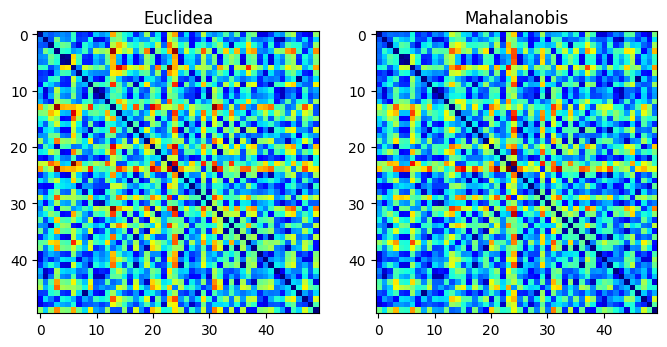

In [ ]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(Ma_euclidea, cmap='jet')
ax[0].set_title('Euclidea')
ax[1].imshow(Ma_mahalanobis, cmap='jet')
ax[1].set_title('Mahalanobis')

In [ ]:
#Hasta ahora hemos visto todo disimilitudes (distancias). ¿Y si quisiéramos una medida de similitud?
def matriz_similitud(X, distancia, mC=None):
    if mC is not None:
        mD = matriz_distancias(X, distancia, mC)
    else:
        mD = matriz_distancias(X, distancia)
    mS = 1 / (1 + mD) # complete
    return mS ## 4.2. Tu código aquí ##

Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.49671415 2.32408397] = 0.0
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.8617357  1.61491772] = 1.344144703993529
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.64768854 1.323078  ] = 1.1519803547902132
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.52302986 2.61167629] = 1.3139080228428655
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76584663 3.03099952] = 1.4377830808357248
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.76586304 2.93128012] = 1.3380472596818171
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [3.57921282 1.16078248] = 2.245800155113592
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [2.76743473 1.69078762] = 0.9040169213876856
Distancia euclidiana del punto [2.49671415 2.32408397] al punto [1.53052561 2.33126343] = 0.9733680009549539
Distancia euclidiana del punto [2.49

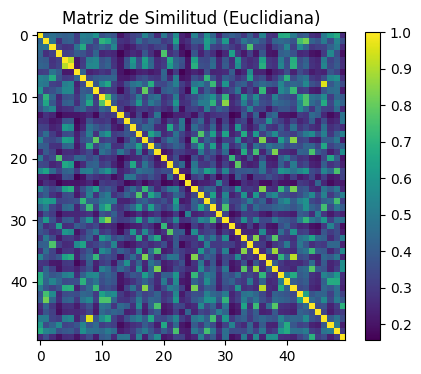

In [ ]:
# Complete 4.3 Grafique la matriz de similitud
Ma_similitud = matriz_similitud(X, distancia_euclidiana)

plt.figure(figsize=(5, 4))
plt.imshow(Ma_similitud, cmap='viridis')
plt.colorbar()
plt.title('Matriz de Similitud (Euclidiana)')
plt.show()

# ✅ **RESULTADOS:**
¿Cual grafico es mas facil de interpretar: el de una medida de disimilitud o de similitud?

Se puede observar que el gráfico de la medida de similitud es más fácil de interpretar que el de la medida de disimilitud.

Esto se debe a que en la matriz de similitud los valores altos representan mayor parecido entre los puntos, lo cual resulta más intuitivo visualmente: las zonas claras indican puntos muy similares y la diagonal principal resalta claramente porque cada punto es idéntico a sí mismo. En cambio, en las matrices de disimilitud (distancias), los valores altos indican mayor lejanía, lo que requiere un mayor esfuerzo cognitivo para interpretar qué puntos están realmente relacionados.

Además, la similitud suele estar normalizada en un rango fijo (por ejemplo, entre 0 y 1), lo que facilita la comparación visual y la identificación de patrones o grupos. Por estas razones, el gráfico de similitud permite una interpretación más rápida y clara que el de disimilitud.



# 🚀 ¡TALLER FINALIZADO!"